In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from random import randint

In [2]:
#from matplotlib.colors import ListedColormap

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import cv2

In [5]:
class AdaLineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.01, size= 1 + X.shape[1])

        self.cost_ = []
        
        for i in  range(self.n_iter ):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors) 
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            
            self.cost_.append(cost)
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # w_[0] нейрон смещения
    def activation(self, X):
        return X
        #return 1.0 / (1.0 + np.exp(- X ))
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [6]:
# Учим просто понимать можно поставить на текущую позицию в линии или нельзя

X = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1], 
    
     
    [0,0,-1],
    [0,-1,0],
    [0,-1,-1],
    [-1,0,0],
    [-1,0,-1],
    [-1,-1,0],
    [-1,-1,-1],
])

X = np.where(X==-1, 2, X)
X = np.where(X==0, -1, X)

y1 =  np.array([1,1,1,1, -1,-1,-1,-1,  1,1,1,-1,-1,-1,-1])

y2 = np.array([1,1, -1,-1, 1,1, -1,-1, 1, -1,-1, 1,1, -1,-1])

y3 = np.array([1, -1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1])



<IPython.core.display.Javascript object>


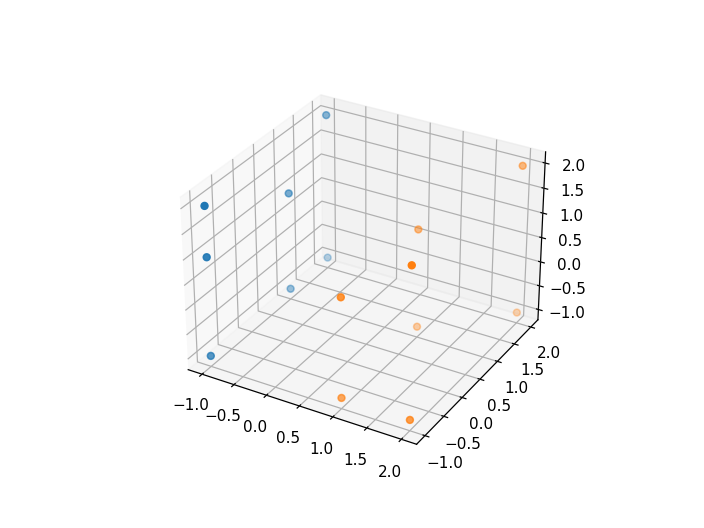

In [7]:
%matplotlib notebook
x1 = X[y1 == 1]
x2 = X[y1 == -1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2])
ax.scatter(x2.T[0], x2.T[1],x2.T[2])

In [8]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y1, test_size=0.2, random_state = 1, stratify=y1
)


In [9]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y2, test_size=0.2, random_state = 1, stratify=y2
)


In [10]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X, y3, test_size=0.2, random_state = 1, stratify=y3
)


In [11]:
ada1 = AdaLineGD( eta=0.01, n_iter=30, random_state=1)
ada2 = AdaLineGD( eta=0.01, n_iter=30, random_state=1)
ada3 = AdaLineGD( eta=0.01, n_iter=30, random_state=1)

<IPython.core.display.Javascript object>


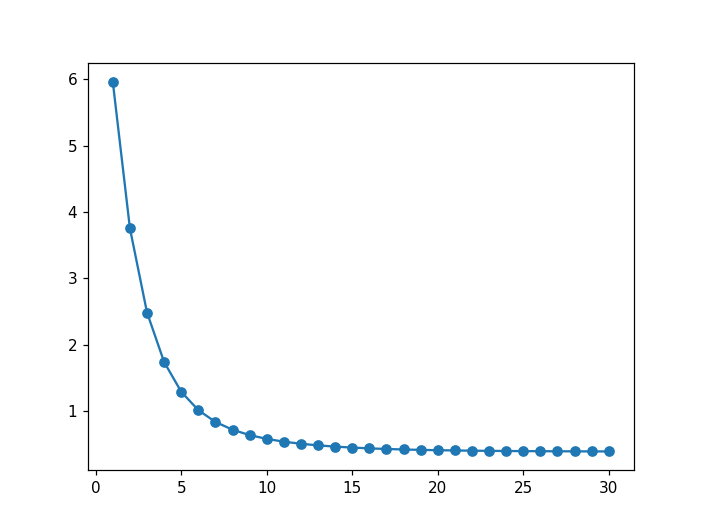

In [19]:
ada1.fit(X_train1, y_train1)
plt.plot(range(1 , len(ada1.cost_) + 1 ), ada1.cost_, marker='o')
plt.show()

<IPython.core.display.Javascript object>


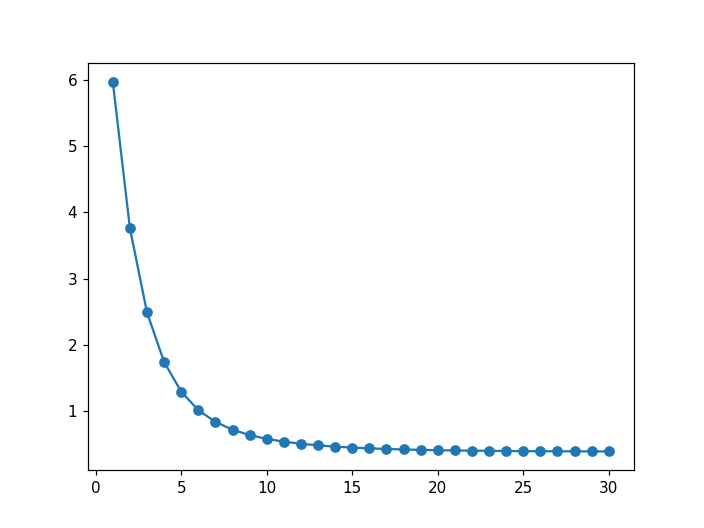

In [18]:
ada2.fit(X_train2, y_train2)
plt.plot(range(1 , len(ada2.cost_) + 1 ), ada2.cost_, marker='o')
plt.show()

<IPython.core.display.Javascript object>


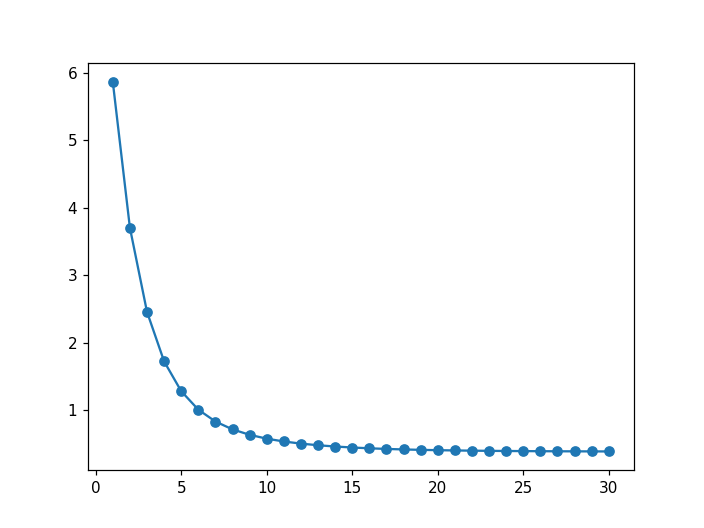

In [20]:
ada3.fit(X_train3, y_train3)
plt.plot(range(1 , len(ada3.cost_) + 1 ), ada3.cost_, marker='o')
plt.show()

In [21]:
ada1.predict([1,2,0])

array(-1)

In [22]:
ada2.predict([4,0,4])

array(1)

In [23]:
ada3.predict([0,0,1])

array(-1)

<IPython.core.display.Javascript object>


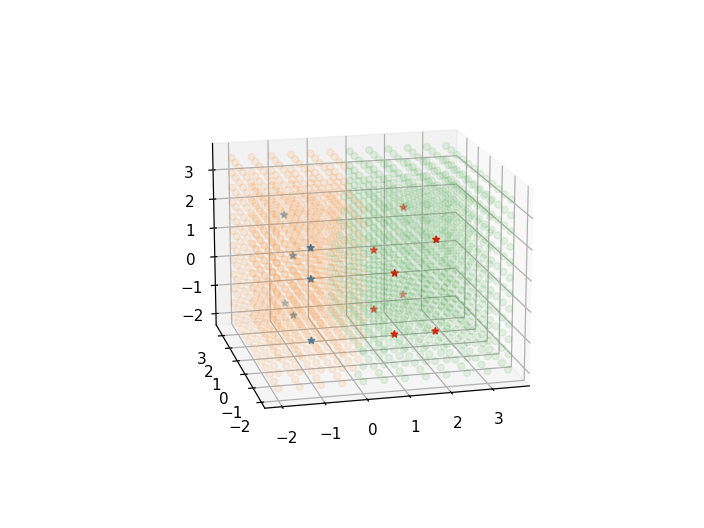

In [33]:
x1 = X[y1 == 1]
x2 = X[y1 == -1]


x_ = np.arange(-2, 4, 0.5)
y_ = np.arange(-2, 4, 0.5)
z_ = np.arange(-2, 4, 0.5)

xx, yy, zz= np.meshgrid(x_, y_, z_)
all_dots = np.array([xx.ravel(), yy.ravel(), zz.ravel()]).T 
result = ada1.predict(all_dots)

a = all_dots[result == 1]
b = all_dots[result == -1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2], marker='*')
ax.scatter(x2.T[0], x2.T[1],x2.T[2], marker='*', color='red')

ax.scatter( a.T[0], a.T[1], a.T[2], alpha=0.1)
ax.scatter( b.T[0], b.T[1], b.T[2], alpha=0.1)

# Обучаем наши игровые нейроны

## Нейрон 1 - ada_win

####  Всегда хочет победить
#### Ставит всё на удачу
#### Ему всегда везеь 
#### Любит талисманы

In [35]:
X_win = np.array([
   
    [0,0,0], # -  
    [0,0,1], # -
    [0,1,0], # - 
    [0,1,1], # +
    [1,0,0], # -
    [1,0,1], # +
    [1,1,0], # +
     
    [0,0,-1], # - 
    [0,-1,0], # - 
    [0,-1,-1], # - 
    [-1,0,0], # - 
    [-1,0,-1], # - 
    [-1,-1,0], # - 
    
     [0,1,1], # +
     [1,1,0], # +
     [0,1,1], # +
     [1,1,0], # +
])
X_win = np.where(X_win==-1, 10, X_win)
X_win = np.where(X_win==0, -1, X_win)

y_win = np.array([
                  -1, -1, -1,
                  1, 
                  -1,
                 1,1,
                 -1,-1,-1, -1,-1,-1,
    
                   1,1,1,1
                 ])

X_win.shape[0] == y_win.shape[0]


True

<IPython.core.display.Javascript object>


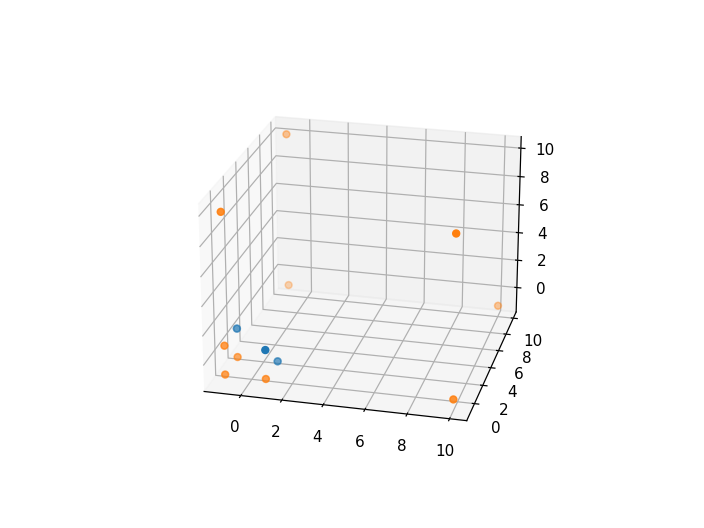

In [44]:
x1 = X_win[y_win == 1]
x2 = X_win[y_win == -1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2])
ax.scatter(x2.T[0], x2.T[1],x2.T[2])

In [38]:
X_train_win, X_test_win, y_train_win, y_test_win = train_test_split(
    X_win, y_win, test_size=0.2, random_state = 1, stratify=y_win
)
X_test_win

array([[ 1,  1, -1],
       [10, -1, 10],
       [-1,  1,  1],
       [-1, 10, -1]])

In [39]:
ada_win = AdaLineGD( eta=0.001, n_iter=500, random_state=1)

<IPython.core.display.Javascript object>


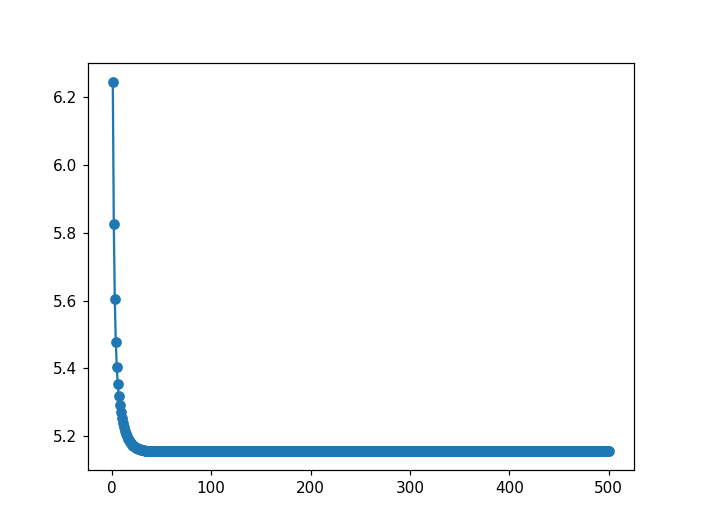

In [40]:
ada_win.fit(X_train_win, y_train_win)
plt.plot(range(1 , len(ada_win.cost_) + 1 ), ada_win.cost_, marker='o')
plt.show()

In [34]:
ada_win.predict([1,2,1])

array(-1)

<IPython.core.display.Javascript object>


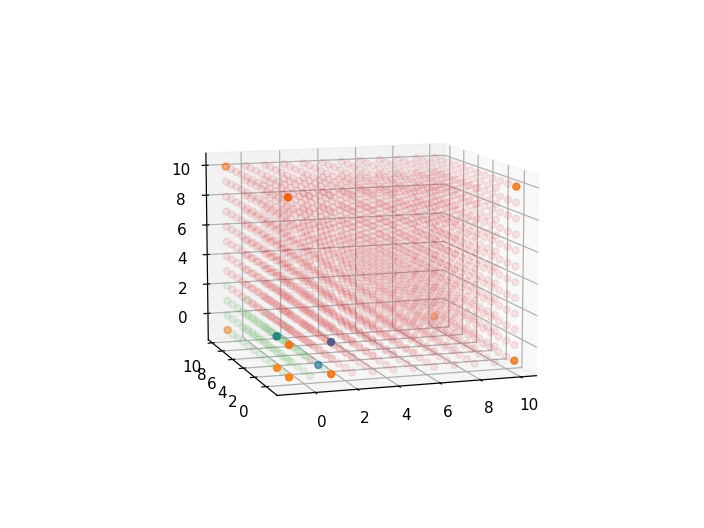

In [45]:
%matplotlib notebook

x_ = np.arange(-1, 11, 1)
y_ = np.arange(-1, 11, 1)
z_ = np.arange(-1, 11, 1)

xx, yy, zz= np.meshgrid(x_, y_, z_)
all_dots = np.array([xx.ravel(), yy.ravel(), zz.ravel()]).T 
result = ada_win.predict(all_dots)

a = all_dots[result == 1 ]
b = all_dots[result == -1]


x1 = X_win[y_win == 1]
x2 = X_win[y_win == -1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2])
ax.scatter(x2.T[0], x2.T[1],x2.T[2])
#print(z)


ax.scatter( a.T[0], a.T[1], a.T[2], alpha=0.1)
ax.scatter( b.T[0], b.T[1], b.T[2], alpha=0.1)


In [46]:
from sklearn.svm import SVC 

In [47]:
svc_win = SVC(kernel='rbf', random_state=1, gamma=0.50, C=10.0)

In [48]:
svc_win.fit(X_train_win, y_train_win)


SVC(C=10.0, gamma=0.5, random_state=1)

In [49]:

svc_win.predict( [np.array([1,-1,1])]) 

array([1])

<IPython.core.display.Javascript object>


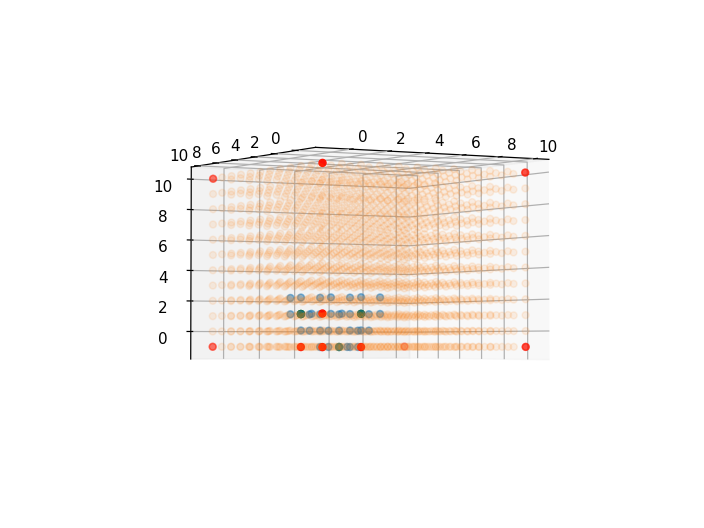

In [58]:
%matplotlib notebook

x_ = np.arange(-1, 11, 1)
y_ = np.arange(-1, 11, 1)
z_ = np.arange(-1, 11, 1)

xx, yy, zz= np.meshgrid(x_, y_, z_)
all_dots = np.array([xx.ravel(), yy.ravel(), zz.ravel()]).T 
result = svc_win.predict(all_dots)

a = all_dots[result == 1 ]
b = all_dots[result == -1]


x1 = X_win[y_win == 1]
x2 = X_win[y_win == -1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2], color='darkgreen')
ax.scatter(x2.T[0], x2.T[1],x2.T[2], color='red')
#print(z)


ax.scatter( a.T[0], a.T[1], a.T[2], alpha=0.5)
ax.scatter( b.T[0], b.T[1], b.T[2], alpha=0.1)


# ada_lose

In [109]:
X_lose = np.array([
    [0,0,0],
    [0,0,1],

    [0,1,1],

    [1,0,1],
    [1,1,0],
        
    [0,0,-1],
    [0,-1,0],
    [0,-1,-1], #
    [-1,0,0],
    [-1,0,-1],#
    [-1,-1,0],#
    
    [-1,0,-1],#
    [-1,-1,0],#
    [0,-1,-1],#
    [-1,-1,0],#
    
     #[-1,0,-1],#
   # [-1,0,-1],#
    [-1,-1,0],#
    [-1,-1,0],#
    
    [0,1,-1],
    [-1,0,1],
    [1,-1,0],
    
    [1,0,-1],
    [-1,1,0],
    [0,-1,1],
])

X_lose = np.where(X_lose == -1, 10, X_lose)
X_lose = np.where(X_lose == 0, -1, X_lose)


y_lose = np.array([ -1, -1, -1, -1, -1, 
                    -1,  -1, 1,  -1, 1, 1,
                   1, 1, 1, 1, 1, 1, #1, #1,
                   -1, -1,-1,-1, -1, -1
])


<IPython.core.display.Javascript object>


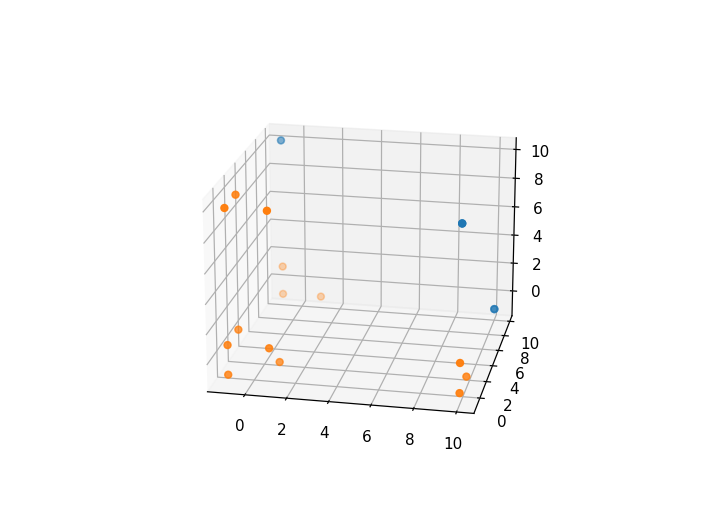

In [110]:
%matplotlib notebook


x1 = X_lose[y_lose == 1]
x2 = X_lose[y_lose == -1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2])
ax.scatter(x2.T[0], x2.T[1],x2.T[2])

In [116]:
Xtrain_lose, X_test_lose, y_train_lose, y_test_lose = train_test_split(
X_lose, y_lose, test_size=0.1, random_state=1, stratify=y_lose
)

In [117]:
ada_lose = AdaLineGD (eta=0.001, n_iter=400, random_state=1)

In [118]:
ada_lose.fit(X_lose, y_lose)
plt.plot( range(1, len(ada_lose.cost_)+1), ada_lose.cost_, marker='')

NameError: name 'plot' is not defined